<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [152]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [201]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [202]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [203]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [204]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [205]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [206]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [207]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

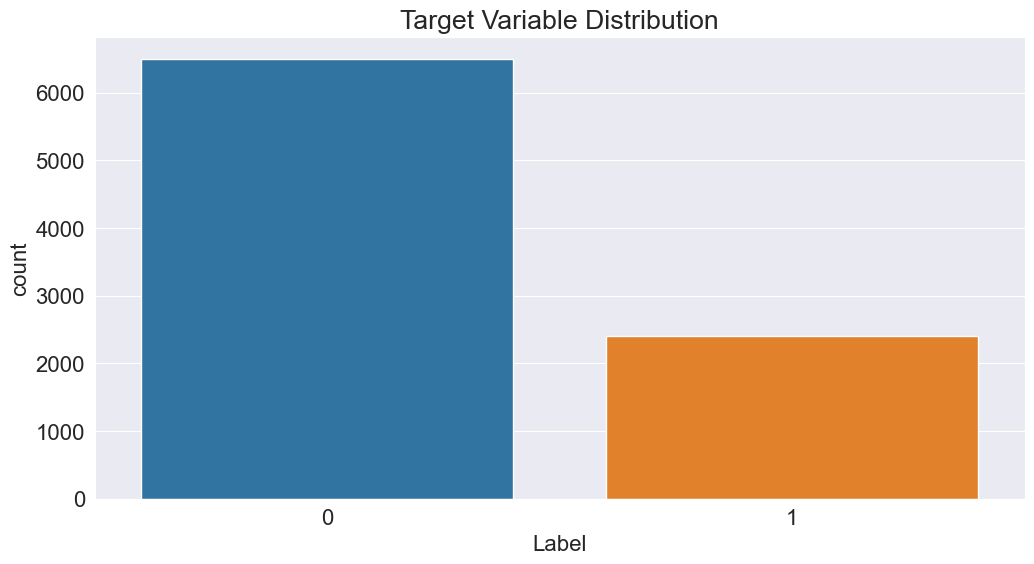

In [208]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

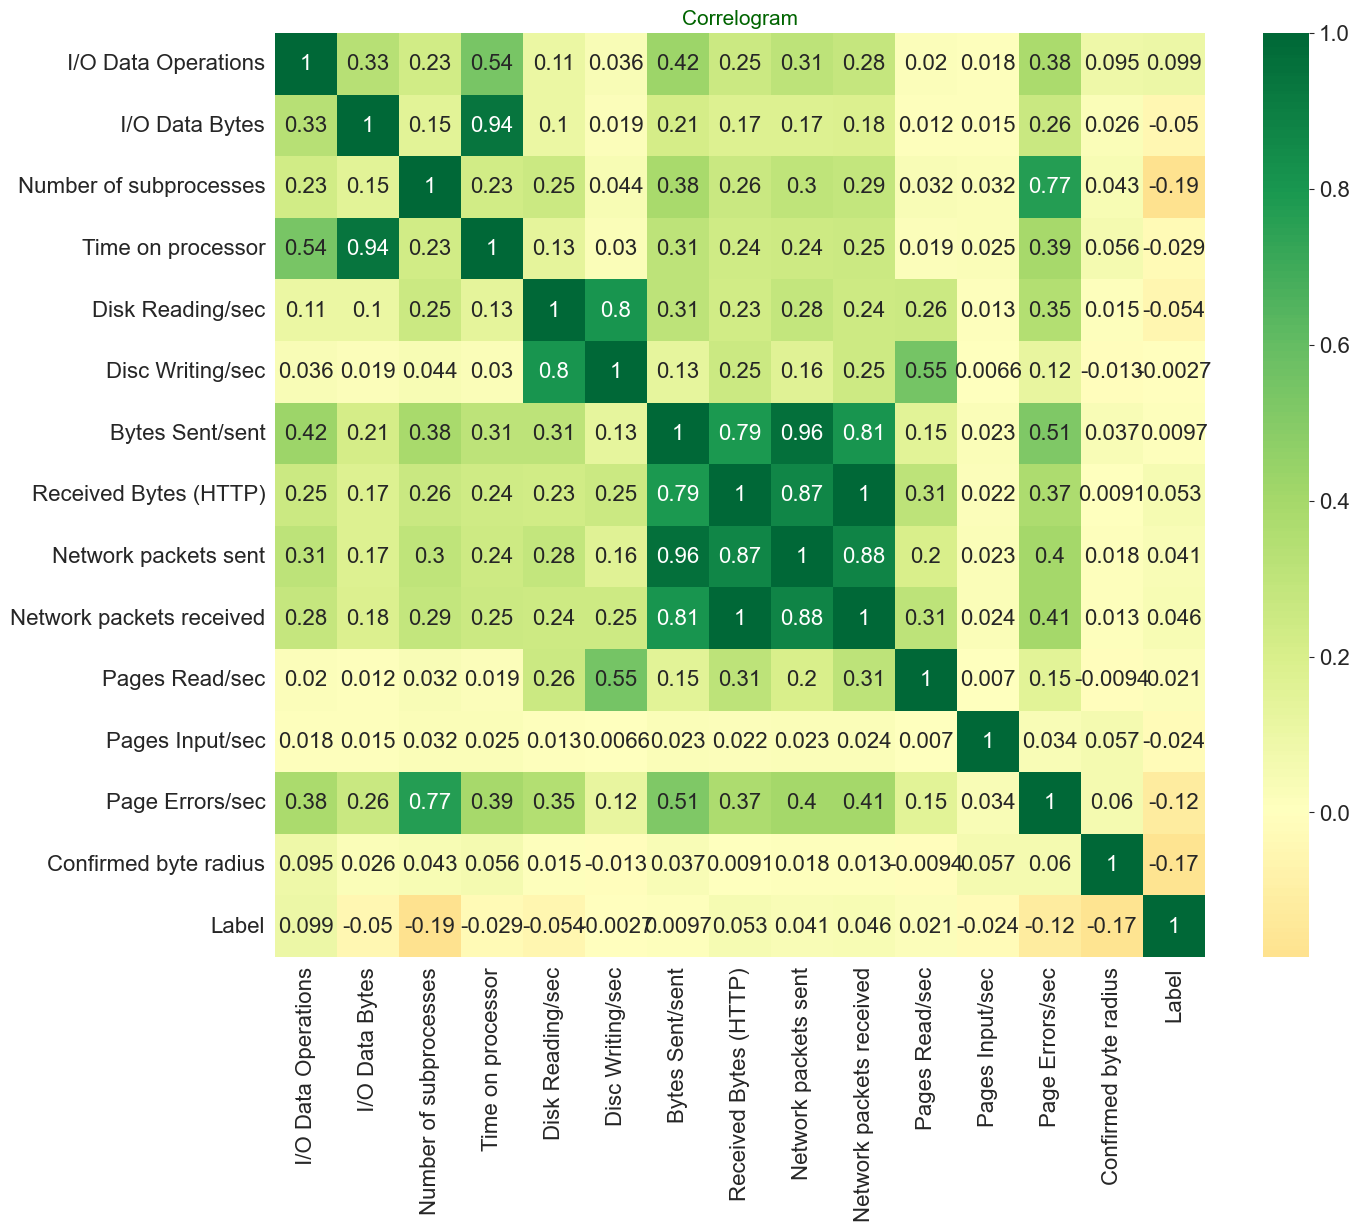

In [209]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

<a name="Preprocess"></a>
## 6. Modeling

In [210]:
#scale numerical features for logistic model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [211]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.2,
                                                    random_state=42)

In [164]:
# !pip install catboost

In [165]:
from catboost import CatBoostClassifier
for max_depth in [3, 5, 8, 10, 14, 18]:
    ml = CatBoostClassifier()
    # Again, you van use a better method to evaluate the model here...
    ml.fit(X_train, y_train)

Learning rate set to 0.023829
0:	learn: 0.6590829	total: 5.06ms	remaining: 5.05s
1:	learn: 0.6280580	total: 10.1ms	remaining: 5.05s
2:	learn: 0.6000765	total: 17.5ms	remaining: 5.81s
3:	learn: 0.5717162	total: 23.9ms	remaining: 5.96s
4:	learn: 0.5479079	total: 28.7ms	remaining: 5.71s
5:	learn: 0.5289310	total: 33.1ms	remaining: 5.49s
6:	learn: 0.5124886	total: 38.7ms	remaining: 5.49s
7:	learn: 0.4950158	total: 43.8ms	remaining: 5.42s
8:	learn: 0.4798242	total: 51ms	remaining: 5.61s
9:	learn: 0.4638673	total: 58.4ms	remaining: 5.78s
10:	learn: 0.4511926	total: 66.3ms	remaining: 5.96s
11:	learn: 0.4391109	total: 74.5ms	remaining: 6.13s
12:	learn: 0.4316552	total: 82.7ms	remaining: 6.28s
13:	learn: 0.4230811	total: 90.2ms	remaining: 6.36s
14:	learn: 0.4116684	total: 97.4ms	remaining: 6.4s
15:	learn: 0.4036421	total: 105ms	remaining: 6.47s
16:	learn: 0.3958334	total: 112ms	remaining: 6.49s
17:	learn: 0.3877145	total: 118ms	remaining: 6.45s
18:	learn: 0.3779736	total: 125ms	remaining: 6.43s

180:	learn: 0.1550291	total: 820ms	remaining: 3.71s
181:	learn: 0.1545778	total: 825ms	remaining: 3.71s
182:	learn: 0.1541996	total: 829ms	remaining: 3.7s
183:	learn: 0.1537937	total: 833ms	remaining: 3.69s
184:	learn: 0.1535487	total: 838ms	remaining: 3.69s
185:	learn: 0.1531798	total: 843ms	remaining: 3.69s
186:	learn: 0.1528108	total: 849ms	remaining: 3.69s
187:	learn: 0.1524255	total: 854ms	remaining: 3.69s
188:	learn: 0.1520159	total: 858ms	remaining: 3.68s
189:	learn: 0.1515295	total: 863ms	remaining: 3.68s
190:	learn: 0.1510587	total: 867ms	remaining: 3.67s
191:	learn: 0.1504897	total: 871ms	remaining: 3.67s
192:	learn: 0.1502036	total: 875ms	remaining: 3.66s
193:	learn: 0.1498597	total: 880ms	remaining: 3.65s
194:	learn: 0.1493936	total: 884ms	remaining: 3.65s
195:	learn: 0.1491796	total: 887ms	remaining: 3.64s
196:	learn: 0.1489795	total: 891ms	remaining: 3.63s
197:	learn: 0.1487549	total: 896ms	remaining: 3.63s
198:	learn: 0.1484061	total: 900ms	remaining: 3.62s
199:	learn: 0

352:	learn: 0.1063254	total: 1.63s	remaining: 3s
353:	learn: 0.1061095	total: 1.64s	remaining: 2.99s
354:	learn: 0.1059821	total: 1.64s	remaining: 2.98s
355:	learn: 0.1059099	total: 1.65s	remaining: 2.98s
356:	learn: 0.1057146	total: 1.65s	remaining: 2.98s
357:	learn: 0.1054713	total: 1.66s	remaining: 2.97s
358:	learn: 0.1053253	total: 1.66s	remaining: 2.97s
359:	learn: 0.1052094	total: 1.67s	remaining: 2.96s
360:	learn: 0.1050228	total: 1.67s	remaining: 2.96s
361:	learn: 0.1048719	total: 1.68s	remaining: 2.95s
362:	learn: 0.1046124	total: 1.68s	remaining: 2.95s
363:	learn: 0.1043640	total: 1.69s	remaining: 2.94s
364:	learn: 0.1041952	total: 1.69s	remaining: 2.94s
365:	learn: 0.1040980	total: 1.7s	remaining: 2.94s
366:	learn: 0.1040311	total: 1.7s	remaining: 2.93s
367:	learn: 0.1038613	total: 1.7s	remaining: 2.93s
368:	learn: 0.1037447	total: 1.71s	remaining: 2.92s
369:	learn: 0.1036059	total: 1.71s	remaining: 2.92s
370:	learn: 0.1035013	total: 1.72s	remaining: 2.91s
371:	learn: 0.1030

532:	learn: 0.0762246	total: 2.44s	remaining: 2.14s
533:	learn: 0.0760886	total: 2.45s	remaining: 2.14s
534:	learn: 0.0760444	total: 2.46s	remaining: 2.13s
535:	learn: 0.0758870	total: 2.46s	remaining: 2.13s
536:	learn: 0.0758310	total: 2.47s	remaining: 2.13s
537:	learn: 0.0757818	total: 2.47s	remaining: 2.12s
538:	learn: 0.0756822	total: 2.48s	remaining: 2.12s
539:	learn: 0.0755539	total: 2.48s	remaining: 2.11s
540:	learn: 0.0754058	total: 2.49s	remaining: 2.11s
541:	learn: 0.0752632	total: 2.49s	remaining: 2.1s
542:	learn: 0.0751749	total: 2.5s	remaining: 2.1s
543:	learn: 0.0750959	total: 2.5s	remaining: 2.1s
544:	learn: 0.0749107	total: 2.51s	remaining: 2.09s
545:	learn: 0.0747758	total: 2.51s	remaining: 2.09s
546:	learn: 0.0745648	total: 2.51s	remaining: 2.08s
547:	learn: 0.0745144	total: 2.52s	remaining: 2.08s
548:	learn: 0.0744238	total: 2.52s	remaining: 2.07s
549:	learn: 0.0742104	total: 2.53s	remaining: 2.07s
550:	learn: 0.0741762	total: 2.53s	remaining: 2.06s
551:	learn: 0.074

720:	learn: 0.0578153	total: 3.26s	remaining: 1.26s
721:	learn: 0.0577510	total: 3.27s	remaining: 1.26s
722:	learn: 0.0576626	total: 3.27s	remaining: 1.25s
723:	learn: 0.0575562	total: 3.28s	remaining: 1.25s
724:	learn: 0.0575314	total: 3.28s	remaining: 1.24s
725:	learn: 0.0573866	total: 3.29s	remaining: 1.24s
726:	learn: 0.0572271	total: 3.29s	remaining: 1.24s
727:	learn: 0.0571637	total: 3.3s	remaining: 1.23s
728:	learn: 0.0571177	total: 3.3s	remaining: 1.23s
729:	learn: 0.0570496	total: 3.3s	remaining: 1.22s
730:	learn: 0.0570072	total: 3.31s	remaining: 1.22s
731:	learn: 0.0569407	total: 3.31s	remaining: 1.21s
732:	learn: 0.0568420	total: 3.32s	remaining: 1.21s
733:	learn: 0.0567412	total: 3.32s	remaining: 1.2s
734:	learn: 0.0566230	total: 3.32s	remaining: 1.2s
735:	learn: 0.0565791	total: 3.33s	remaining: 1.19s
736:	learn: 0.0565401	total: 3.33s	remaining: 1.19s
737:	learn: 0.0564397	total: 3.34s	remaining: 1.18s
738:	learn: 0.0564013	total: 3.34s	remaining: 1.18s
739:	learn: 0.056

907:	learn: 0.0454423	total: 4.09s	remaining: 415ms
908:	learn: 0.0453956	total: 4.1s	remaining: 410ms
909:	learn: 0.0453877	total: 4.1s	remaining: 406ms
910:	learn: 0.0453618	total: 4.11s	remaining: 401ms
911:	learn: 0.0453337	total: 4.11s	remaining: 397ms
912:	learn: 0.0452701	total: 4.12s	remaining: 392ms
913:	learn: 0.0451856	total: 4.12s	remaining: 388ms
914:	learn: 0.0451313	total: 4.13s	remaining: 383ms
915:	learn: 0.0451235	total: 4.13s	remaining: 379ms
916:	learn: 0.0450279	total: 4.13s	remaining: 374ms
917:	learn: 0.0449927	total: 4.14s	remaining: 370ms
918:	learn: 0.0449798	total: 4.14s	remaining: 365ms
919:	learn: 0.0449049	total: 4.15s	remaining: 361ms
920:	learn: 0.0448190	total: 4.15s	remaining: 356ms
921:	learn: 0.0447569	total: 4.16s	remaining: 352ms
922:	learn: 0.0447283	total: 4.16s	remaining: 347ms
923:	learn: 0.0447088	total: 4.17s	remaining: 343ms
924:	learn: 0.0446729	total: 4.17s	remaining: 338ms
925:	learn: 0.0446387	total: 4.18s	remaining: 334ms
926:	learn: 0.

111:	learn: 0.1897644	total: 547ms	remaining: 4.33s
112:	learn: 0.1890967	total: 551ms	remaining: 4.33s
113:	learn: 0.1886578	total: 555ms	remaining: 4.31s
114:	learn: 0.1877071	total: 560ms	remaining: 4.31s
115:	learn: 0.1868434	total: 564ms	remaining: 4.3s
116:	learn: 0.1861206	total: 568ms	remaining: 4.29s
117:	learn: 0.1856006	total: 573ms	remaining: 4.28s
118:	learn: 0.1851916	total: 578ms	remaining: 4.28s
119:	learn: 0.1846772	total: 582ms	remaining: 4.27s
120:	learn: 0.1841264	total: 586ms	remaining: 4.26s
121:	learn: 0.1832279	total: 591ms	remaining: 4.25s
122:	learn: 0.1824907	total: 595ms	remaining: 4.24s
123:	learn: 0.1820573	total: 599ms	remaining: 4.23s
124:	learn: 0.1812419	total: 603ms	remaining: 4.22s
125:	learn: 0.1805388	total: 608ms	remaining: 4.21s
126:	learn: 0.1797559	total: 612ms	remaining: 4.2s
127:	learn: 0.1792427	total: 615ms	remaining: 4.19s
128:	learn: 0.1788252	total: 619ms	remaining: 4.18s
129:	learn: 0.1783098	total: 624ms	remaining: 4.18s
130:	learn: 0.

285:	learn: 0.1213235	total: 1.34s	remaining: 3.35s
286:	learn: 0.1211303	total: 1.34s	remaining: 3.34s
287:	learn: 0.1209156	total: 1.35s	remaining: 3.34s
288:	learn: 0.1206457	total: 1.35s	remaining: 3.33s
289:	learn: 0.1204505	total: 1.36s	remaining: 3.33s
290:	learn: 0.1200685	total: 1.36s	remaining: 3.32s
291:	learn: 0.1199787	total: 1.37s	remaining: 3.32s
292:	learn: 0.1198236	total: 1.37s	remaining: 3.32s
293:	learn: 0.1196851	total: 1.38s	remaining: 3.31s
294:	learn: 0.1194917	total: 1.38s	remaining: 3.31s
295:	learn: 0.1194162	total: 1.39s	remaining: 3.3s
296:	learn: 0.1192759	total: 1.39s	remaining: 3.29s
297:	learn: 0.1189947	total: 1.4s	remaining: 3.29s
298:	learn: 0.1188030	total: 1.4s	remaining: 3.28s
299:	learn: 0.1186039	total: 1.41s	remaining: 3.28s
300:	learn: 0.1184061	total: 1.41s	remaining: 3.28s
301:	learn: 0.1181353	total: 1.42s	remaining: 3.27s
302:	learn: 0.1180778	total: 1.42s	remaining: 3.27s
303:	learn: 0.1177796	total: 1.42s	remaining: 3.26s
304:	learn: 0.1

466:	learn: 0.0856075	total: 2.16s	remaining: 2.47s
467:	learn: 0.0854534	total: 2.17s	remaining: 2.46s
468:	learn: 0.0853444	total: 2.17s	remaining: 2.46s
469:	learn: 0.0851932	total: 2.17s	remaining: 2.45s
470:	learn: 0.0850865	total: 2.18s	remaining: 2.45s
471:	learn: 0.0849319	total: 2.18s	remaining: 2.44s
472:	learn: 0.0847664	total: 2.19s	remaining: 2.44s
473:	learn: 0.0845950	total: 2.19s	remaining: 2.43s
474:	learn: 0.0844195	total: 2.2s	remaining: 2.43s
475:	learn: 0.0842190	total: 2.2s	remaining: 2.42s
476:	learn: 0.0840015	total: 2.21s	remaining: 2.42s
477:	learn: 0.0838692	total: 2.21s	remaining: 2.41s
478:	learn: 0.0836996	total: 2.21s	remaining: 2.41s
479:	learn: 0.0834735	total: 2.22s	remaining: 2.4s
480:	learn: 0.0834140	total: 2.22s	remaining: 2.4s
481:	learn: 0.0831989	total: 2.23s	remaining: 2.4s
482:	learn: 0.0831008	total: 2.23s	remaining: 2.39s
483:	learn: 0.0828803	total: 2.24s	remaining: 2.38s
484:	learn: 0.0826981	total: 2.24s	remaining: 2.38s
485:	learn: 0.082

648:	learn: 0.0639735	total: 2.98s	remaining: 1.61s
649:	learn: 0.0639191	total: 2.98s	remaining: 1.6s
650:	learn: 0.0638085	total: 2.99s	remaining: 1.6s
651:	learn: 0.0636998	total: 2.99s	remaining: 1.6s
652:	learn: 0.0636710	total: 3s	remaining: 1.59s
653:	learn: 0.0635740	total: 3s	remaining: 1.59s
654:	learn: 0.0635129	total: 3.01s	remaining: 1.58s
655:	learn: 0.0633676	total: 3.01s	remaining: 1.58s
656:	learn: 0.0632140	total: 3.02s	remaining: 1.57s
657:	learn: 0.0631139	total: 3.02s	remaining: 1.57s
658:	learn: 0.0630911	total: 3.02s	remaining: 1.56s
659:	learn: 0.0629778	total: 3.03s	remaining: 1.56s
660:	learn: 0.0629460	total: 3.03s	remaining: 1.55s
661:	learn: 0.0627246	total: 3.04s	remaining: 1.55s
662:	learn: 0.0625838	total: 3.04s	remaining: 1.55s
663:	learn: 0.0625093	total: 3.05s	remaining: 1.54s
664:	learn: 0.0624499	total: 3.05s	remaining: 1.54s
665:	learn: 0.0623428	total: 3.06s	remaining: 1.53s
666:	learn: 0.0621574	total: 3.06s	remaining: 1.53s
667:	learn: 0.0621118

824:	learn: 0.0504952	total: 3.8s	remaining: 806ms
825:	learn: 0.0504616	total: 3.8s	remaining: 801ms
826:	learn: 0.0504252	total: 3.81s	remaining: 797ms
827:	learn: 0.0503373	total: 3.81s	remaining: 792ms
828:	learn: 0.0502907	total: 3.82s	remaining: 788ms
829:	learn: 0.0502814	total: 3.83s	remaining: 784ms
830:	learn: 0.0502061	total: 3.83s	remaining: 779ms
831:	learn: 0.0501184	total: 3.83s	remaining: 774ms
832:	learn: 0.0500979	total: 3.84s	remaining: 770ms
833:	learn: 0.0499572	total: 3.84s	remaining: 765ms
834:	learn: 0.0498722	total: 3.85s	remaining: 761ms
835:	learn: 0.0498275	total: 3.85s	remaining: 756ms
836:	learn: 0.0497446	total: 3.86s	remaining: 751ms
837:	learn: 0.0497201	total: 3.86s	remaining: 747ms
838:	learn: 0.0496881	total: 3.87s	remaining: 742ms
839:	learn: 0.0496042	total: 3.87s	remaining: 737ms
840:	learn: 0.0495938	total: 3.88s	remaining: 733ms
841:	learn: 0.0495596	total: 3.88s	remaining: 728ms
842:	learn: 0.0495359	total: 3.88s	remaining: 724ms
843:	learn: 0.

Learning rate set to 0.023829
0:	learn: 0.6590829	total: 8.95ms	remaining: 8.94s
1:	learn: 0.6280580	total: 17.7ms	remaining: 8.82s
2:	learn: 0.6000765	total: 25.1ms	remaining: 8.35s
3:	learn: 0.5717162	total: 30.9ms	remaining: 7.71s
4:	learn: 0.5479079	total: 39.1ms	remaining: 7.78s
5:	learn: 0.5289310	total: 46ms	remaining: 7.62s
6:	learn: 0.5124886	total: 54.7ms	remaining: 7.76s
7:	learn: 0.4950158	total: 62.3ms	remaining: 7.73s
8:	learn: 0.4798242	total: 70.9ms	remaining: 7.81s
9:	learn: 0.4638673	total: 75.8ms	remaining: 7.51s
10:	learn: 0.4511926	total: 81.7ms	remaining: 7.35s
11:	learn: 0.4391109	total: 88ms	remaining: 7.24s
12:	learn: 0.4316552	total: 95.1ms	remaining: 7.22s
13:	learn: 0.4230811	total: 100ms	remaining: 7.07s
14:	learn: 0.4116684	total: 106ms	remaining: 6.99s
15:	learn: 0.4036421	total: 111ms	remaining: 6.85s
16:	learn: 0.3958334	total: 116ms	remaining: 6.7s
17:	learn: 0.3877145	total: 121ms	remaining: 6.61s
18:	learn: 0.3779736	total: 125ms	remaining: 6.46s
19:

165:	learn: 0.1620064	total: 823ms	remaining: 4.13s
166:	learn: 0.1613173	total: 827ms	remaining: 4.13s
167:	learn: 0.1606612	total: 832ms	remaining: 4.12s
168:	learn: 0.1603150	total: 837ms	remaining: 4.11s
169:	learn: 0.1599455	total: 842ms	remaining: 4.11s
170:	learn: 0.1596039	total: 846ms	remaining: 4.1s
171:	learn: 0.1586011	total: 850ms	remaining: 4.09s
172:	learn: 0.1582319	total: 855ms	remaining: 4.08s
173:	learn: 0.1578906	total: 859ms	remaining: 4.08s
174:	learn: 0.1575279	total: 863ms	remaining: 4.07s
175:	learn: 0.1569917	total: 867ms	remaining: 4.06s
176:	learn: 0.1565660	total: 872ms	remaining: 4.05s
177:	learn: 0.1561938	total: 876ms	remaining: 4.04s
178:	learn: 0.1558909	total: 880ms	remaining: 4.03s
179:	learn: 0.1555167	total: 884ms	remaining: 4.03s
180:	learn: 0.1550291	total: 889ms	remaining: 4.02s
181:	learn: 0.1545778	total: 894ms	remaining: 4.02s
182:	learn: 0.1541996	total: 898ms	remaining: 4.01s
183:	learn: 0.1537937	total: 903ms	remaining: 4s
184:	learn: 0.15

325:	learn: 0.1125360	total: 1.65s	remaining: 3.41s
326:	learn: 0.1123212	total: 1.66s	remaining: 3.41s
327:	learn: 0.1119616	total: 1.66s	remaining: 3.41s
328:	learn: 0.1116535	total: 1.67s	remaining: 3.41s
329:	learn: 0.1113489	total: 1.68s	remaining: 3.41s
330:	learn: 0.1110567	total: 1.69s	remaining: 3.41s
331:	learn: 0.1106344	total: 1.69s	remaining: 3.4s
332:	learn: 0.1104165	total: 1.7s	remaining: 3.4s
333:	learn: 0.1102433	total: 1.7s	remaining: 3.4s
334:	learn: 0.1101141	total: 1.71s	remaining: 3.4s
335:	learn: 0.1099111	total: 1.72s	remaining: 3.39s
336:	learn: 0.1096269	total: 1.72s	remaining: 3.38s
337:	learn: 0.1094034	total: 1.73s	remaining: 3.38s
338:	learn: 0.1092256	total: 1.73s	remaining: 3.38s
339:	learn: 0.1088638	total: 1.74s	remaining: 3.37s
340:	learn: 0.1086681	total: 1.74s	remaining: 3.37s
341:	learn: 0.1084635	total: 1.75s	remaining: 3.36s
342:	learn: 0.1081835	total: 1.75s	remaining: 3.36s
343:	learn: 0.1080618	total: 1.76s	remaining: 3.35s
344:	learn: 0.1079

495:	learn: 0.0812513	total: 2.7s	remaining: 2.74s
496:	learn: 0.0811093	total: 2.71s	remaining: 2.74s
497:	learn: 0.0808597	total: 2.72s	remaining: 2.74s
498:	learn: 0.0806825	total: 2.73s	remaining: 2.74s
499:	learn: 0.0805911	total: 2.73s	remaining: 2.73s
500:	learn: 0.0804625	total: 2.73s	remaining: 2.72s
501:	learn: 0.0803359	total: 2.74s	remaining: 2.72s
502:	learn: 0.0802185	total: 2.75s	remaining: 2.71s
503:	learn: 0.0799887	total: 2.75s	remaining: 2.71s
504:	learn: 0.0798241	total: 2.76s	remaining: 2.7s
505:	learn: 0.0796300	total: 2.76s	remaining: 2.7s
506:	learn: 0.0795203	total: 2.77s	remaining: 2.69s
507:	learn: 0.0794429	total: 2.77s	remaining: 2.69s
508:	learn: 0.0793082	total: 2.78s	remaining: 2.68s
509:	learn: 0.0792018	total: 2.79s	remaining: 2.68s
510:	learn: 0.0789881	total: 2.79s	remaining: 2.67s
511:	learn: 0.0789382	total: 2.8s	remaining: 2.67s
512:	learn: 0.0787421	total: 2.81s	remaining: 2.66s
513:	learn: 0.0786306	total: 2.81s	remaining: 2.66s
514:	learn: 0.07

665:	learn: 0.0623428	total: 3.73s	remaining: 1.87s
666:	learn: 0.0621574	total: 3.73s	remaining: 1.86s
667:	learn: 0.0621118	total: 3.74s	remaining: 1.86s
668:	learn: 0.0619758	total: 3.75s	remaining: 1.85s
669:	learn: 0.0618664	total: 3.75s	remaining: 1.85s
670:	learn: 0.0618241	total: 3.76s	remaining: 1.84s
671:	learn: 0.0617697	total: 3.77s	remaining: 1.84s
672:	learn: 0.0616795	total: 3.77s	remaining: 1.83s
673:	learn: 0.0616455	total: 3.78s	remaining: 1.83s
674:	learn: 0.0615418	total: 3.79s	remaining: 1.82s
675:	learn: 0.0614891	total: 3.79s	remaining: 1.82s
676:	learn: 0.0614306	total: 3.8s	remaining: 1.81s
677:	learn: 0.0613286	total: 3.8s	remaining: 1.8s
678:	learn: 0.0612357	total: 3.81s	remaining: 1.8s
679:	learn: 0.0611643	total: 3.81s	remaining: 1.79s
680:	learn: 0.0609866	total: 3.82s	remaining: 1.79s
681:	learn: 0.0609274	total: 3.83s	remaining: 1.78s
682:	learn: 0.0608193	total: 3.83s	remaining: 1.78s
683:	learn: 0.0607437	total: 3.84s	remaining: 1.77s
684:	learn: 0.06

831:	learn: 0.0501184	total: 4.75s	remaining: 960ms
832:	learn: 0.0500979	total: 4.76s	remaining: 954ms
833:	learn: 0.0499572	total: 4.77s	remaining: 949ms
834:	learn: 0.0498722	total: 4.78s	remaining: 944ms
835:	learn: 0.0498275	total: 4.79s	remaining: 939ms
836:	learn: 0.0497446	total: 4.79s	remaining: 933ms
837:	learn: 0.0497201	total: 4.8s	remaining: 927ms
838:	learn: 0.0496881	total: 4.8s	remaining: 922ms
839:	learn: 0.0496042	total: 4.81s	remaining: 916ms
840:	learn: 0.0495938	total: 4.82s	remaining: 911ms
841:	learn: 0.0495596	total: 4.82s	remaining: 905ms
842:	learn: 0.0495359	total: 4.83s	remaining: 899ms
843:	learn: 0.0494633	total: 4.83s	remaining: 893ms
844:	learn: 0.0494195	total: 4.84s	remaining: 887ms
845:	learn: 0.0493158	total: 4.84s	remaining: 882ms
846:	learn: 0.0493031	total: 4.85s	remaining: 876ms
847:	learn: 0.0492110	total: 4.86s	remaining: 870ms
848:	learn: 0.0491210	total: 4.86s	remaining: 865ms
849:	learn: 0.0490651	total: 4.87s	remaining: 859ms
850:	learn: 0.

996:	learn: 0.0413540	total: 5.75s	remaining: 17.3ms
997:	learn: 0.0412656	total: 5.76s	remaining: 11.5ms
998:	learn: 0.0412372	total: 5.76s	remaining: 5.77ms
999:	learn: 0.0411784	total: 5.77s	remaining: 0us
Learning rate set to 0.023829
0:	learn: 0.6590829	total: 8.79ms	remaining: 8.79s
1:	learn: 0.6280580	total: 17.6ms	remaining: 8.79s
2:	learn: 0.6000765	total: 26.5ms	remaining: 8.79s
3:	learn: 0.5717162	total: 35.1ms	remaining: 8.75s
4:	learn: 0.5479079	total: 43.9ms	remaining: 8.74s
5:	learn: 0.5289310	total: 52.5ms	remaining: 8.69s
6:	learn: 0.5124886	total: 60ms	remaining: 8.51s
7:	learn: 0.4950158	total: 69.4ms	remaining: 8.6s
8:	learn: 0.4798242	total: 78.7ms	remaining: 8.66s
9:	learn: 0.4638673	total: 86ms	remaining: 8.51s
10:	learn: 0.4511926	total: 92.1ms	remaining: 8.28s
11:	learn: 0.4391109	total: 98.8ms	remaining: 8.14s
12:	learn: 0.4316552	total: 105ms	remaining: 7.98s
13:	learn: 0.4230811	total: 112ms	remaining: 7.92s
14:	learn: 0.4116684	total: 119ms	remaining: 7.84s

179:	learn: 0.1555167	total: 1.18s	remaining: 5.37s
180:	learn: 0.1550291	total: 1.19s	remaining: 5.37s
181:	learn: 0.1545778	total: 1.2s	remaining: 5.38s
182:	learn: 0.1541996	total: 1.2s	remaining: 5.38s
183:	learn: 0.1537937	total: 1.21s	remaining: 5.36s
184:	learn: 0.1535487	total: 1.22s	remaining: 5.35s
185:	learn: 0.1531798	total: 1.22s	remaining: 5.35s
186:	learn: 0.1528108	total: 1.23s	remaining: 5.33s
187:	learn: 0.1524255	total: 1.23s	remaining: 5.32s
188:	learn: 0.1520159	total: 1.24s	remaining: 5.31s
189:	learn: 0.1515295	total: 1.24s	remaining: 5.3s
190:	learn: 0.1510587	total: 1.25s	remaining: 5.29s
191:	learn: 0.1504897	total: 1.25s	remaining: 5.28s
192:	learn: 0.1502036	total: 1.26s	remaining: 5.27s
193:	learn: 0.1498597	total: 1.27s	remaining: 5.26s
194:	learn: 0.1493936	total: 1.27s	remaining: 5.25s
195:	learn: 0.1491796	total: 1.28s	remaining: 5.24s
196:	learn: 0.1489795	total: 1.28s	remaining: 5.23s
197:	learn: 0.1487549	total: 1.29s	remaining: 5.22s
198:	learn: 0.1

349:	learn: 0.1071572	total: 2.19s	remaining: 4.08s
350:	learn: 0.1068800	total: 2.2s	remaining: 4.07s
351:	learn: 0.1066619	total: 2.21s	remaining: 4.06s
352:	learn: 0.1063254	total: 2.21s	remaining: 4.06s
353:	learn: 0.1061095	total: 2.24s	remaining: 4.08s
354:	learn: 0.1059821	total: 2.25s	remaining: 4.09s
355:	learn: 0.1059099	total: 2.26s	remaining: 4.08s
356:	learn: 0.1057146	total: 2.26s	remaining: 4.08s
357:	learn: 0.1054713	total: 2.27s	remaining: 4.07s
358:	learn: 0.1053253	total: 2.28s	remaining: 4.07s
359:	learn: 0.1052094	total: 2.28s	remaining: 4.06s
360:	learn: 0.1050228	total: 2.29s	remaining: 4.05s
361:	learn: 0.1048719	total: 2.29s	remaining: 4.04s
362:	learn: 0.1046124	total: 2.3s	remaining: 4.04s
363:	learn: 0.1043640	total: 2.31s	remaining: 4.03s
364:	learn: 0.1041952	total: 2.31s	remaining: 4.02s
365:	learn: 0.1040980	total: 2.32s	remaining: 4.01s
366:	learn: 0.1040311	total: 2.32s	remaining: 4.01s
367:	learn: 0.1038613	total: 2.33s	remaining: 4s
368:	learn: 0.103

512:	learn: 0.0787421	total: 3.21s	remaining: 3.05s
513:	learn: 0.0786306	total: 3.21s	remaining: 3.04s
514:	learn: 0.0785495	total: 3.22s	remaining: 3.03s
515:	learn: 0.0783563	total: 3.23s	remaining: 3.03s
516:	learn: 0.0782618	total: 3.24s	remaining: 3.02s
517:	learn: 0.0781276	total: 3.25s	remaining: 3.02s
518:	learn: 0.0779883	total: 3.25s	remaining: 3.01s
519:	learn: 0.0778280	total: 3.26s	remaining: 3.01s
520:	learn: 0.0776824	total: 3.26s	remaining: 3s
521:	learn: 0.0775150	total: 3.27s	remaining: 2.99s
522:	learn: 0.0774235	total: 3.27s	remaining: 2.99s
523:	learn: 0.0773234	total: 3.28s	remaining: 2.98s
524:	learn: 0.0772209	total: 3.29s	remaining: 2.97s
525:	learn: 0.0771407	total: 3.29s	remaining: 2.97s
526:	learn: 0.0770898	total: 3.3s	remaining: 2.96s
527:	learn: 0.0769360	total: 3.3s	remaining: 2.95s
528:	learn: 0.0767819	total: 3.31s	remaining: 2.95s
529:	learn: 0.0766728	total: 3.31s	remaining: 2.94s
530:	learn: 0.0765173	total: 3.32s	remaining: 2.93s
531:	learn: 0.076

678:	learn: 0.0612357	total: 4.22s	remaining: 2s
679:	learn: 0.0611643	total: 4.23s	remaining: 1.99s
680:	learn: 0.0609866	total: 4.24s	remaining: 1.99s
681:	learn: 0.0609274	total: 4.25s	remaining: 1.98s
682:	learn: 0.0608193	total: 4.26s	remaining: 1.98s
683:	learn: 0.0607437	total: 4.26s	remaining: 1.97s
684:	learn: 0.0607030	total: 4.27s	remaining: 1.96s
685:	learn: 0.0606399	total: 4.28s	remaining: 1.96s
686:	learn: 0.0604732	total: 4.28s	remaining: 1.95s
687:	learn: 0.0604151	total: 4.29s	remaining: 1.95s
688:	learn: 0.0603541	total: 4.29s	remaining: 1.94s
689:	learn: 0.0602108	total: 4.3s	remaining: 1.93s
690:	learn: 0.0601663	total: 4.31s	remaining: 1.93s
691:	learn: 0.0600672	total: 4.31s	remaining: 1.92s
692:	learn: 0.0599734	total: 4.32s	remaining: 1.91s
693:	learn: 0.0598960	total: 4.33s	remaining: 1.91s
694:	learn: 0.0597903	total: 4.33s	remaining: 1.9s
695:	learn: 0.0597401	total: 4.34s	remaining: 1.9s
696:	learn: 0.0595838	total: 4.34s	remaining: 1.89s
697:	learn: 0.0595

845:	learn: 0.0493158	total: 5.24s	remaining: 954ms
846:	learn: 0.0493031	total: 5.25s	remaining: 948ms
847:	learn: 0.0492110	total: 5.25s	remaining: 942ms
848:	learn: 0.0491210	total: 5.26s	remaining: 936ms
849:	learn: 0.0490651	total: 5.27s	remaining: 930ms
850:	learn: 0.0490194	total: 5.28s	remaining: 924ms
851:	learn: 0.0489347	total: 5.28s	remaining: 918ms
852:	learn: 0.0488916	total: 5.29s	remaining: 911ms
853:	learn: 0.0488002	total: 5.29s	remaining: 905ms
854:	learn: 0.0486575	total: 5.3s	remaining: 899ms
855:	learn: 0.0486068	total: 5.3s	remaining: 892ms
856:	learn: 0.0485421	total: 5.31s	remaining: 886ms
857:	learn: 0.0485106	total: 5.32s	remaining: 880ms
858:	learn: 0.0484665	total: 5.32s	remaining: 874ms
859:	learn: 0.0484113	total: 5.33s	remaining: 867ms
860:	learn: 0.0483329	total: 5.33s	remaining: 861ms
861:	learn: 0.0482472	total: 5.34s	remaining: 855ms
862:	learn: 0.0481696	total: 5.34s	remaining: 848ms
863:	learn: 0.0481603	total: 5.35s	remaining: 842ms
864:	learn: 0.

27:	learn: 0.3343374	total: 195ms	remaining: 6.75s
28:	learn: 0.3314579	total: 202ms	remaining: 6.78s
29:	learn: 0.3267090	total: 210ms	remaining: 6.78s
30:	learn: 0.3212148	total: 217ms	remaining: 6.79s
31:	learn: 0.3161034	total: 226ms	remaining: 6.84s
32:	learn: 0.3118915	total: 233ms	remaining: 6.83s
33:	learn: 0.3078438	total: 239ms	remaining: 6.78s
34:	learn: 0.3043591	total: 244ms	remaining: 6.74s
35:	learn: 0.3016401	total: 251ms	remaining: 6.71s
36:	learn: 0.2994747	total: 257ms	remaining: 6.69s
37:	learn: 0.2966525	total: 263ms	remaining: 6.66s
38:	learn: 0.2935732	total: 268ms	remaining: 6.61s
39:	learn: 0.2909533	total: 273ms	remaining: 6.55s
40:	learn: 0.2879648	total: 278ms	remaining: 6.51s
41:	learn: 0.2839908	total: 283ms	remaining: 6.46s
42:	learn: 0.2813222	total: 289ms	remaining: 6.42s
43:	learn: 0.2788324	total: 295ms	remaining: 6.42s
44:	learn: 0.2761669	total: 301ms	remaining: 6.38s
45:	learn: 0.2734377	total: 307ms	remaining: 6.36s
46:	learn: 0.2712774	total: 313

196:	learn: 0.1489795	total: 1.24s	remaining: 5.05s
197:	learn: 0.1487549	total: 1.25s	remaining: 5.05s
198:	learn: 0.1484061	total: 1.25s	remaining: 5.04s
199:	learn: 0.1480941	total: 1.26s	remaining: 5.04s
200:	learn: 0.1478264	total: 1.27s	remaining: 5.04s
201:	learn: 0.1474048	total: 1.27s	remaining: 5.04s
202:	learn: 0.1469418	total: 1.28s	remaining: 5.03s
203:	learn: 0.1466230	total: 1.28s	remaining: 5.02s
204:	learn: 0.1461534	total: 1.29s	remaining: 5.01s
205:	learn: 0.1457363	total: 1.29s	remaining: 4.99s
206:	learn: 0.1453464	total: 1.3s	remaining: 4.99s
207:	learn: 0.1449352	total: 1.31s	remaining: 4.98s
208:	learn: 0.1447017	total: 1.31s	remaining: 4.97s
209:	learn: 0.1445594	total: 1.32s	remaining: 4.97s
210:	learn: 0.1442850	total: 1.33s	remaining: 4.96s
211:	learn: 0.1440053	total: 1.33s	remaining: 4.95s
212:	learn: 0.1433616	total: 1.34s	remaining: 4.94s
213:	learn: 0.1428120	total: 1.34s	remaining: 4.93s
214:	learn: 0.1423398	total: 1.35s	remaining: 4.92s
215:	learn: 0

364:	learn: 0.1041952	total: 2.27s	remaining: 3.95s
365:	learn: 0.1040980	total: 2.28s	remaining: 3.94s
366:	learn: 0.1040311	total: 2.28s	remaining: 3.94s
367:	learn: 0.1038613	total: 2.29s	remaining: 3.94s
368:	learn: 0.1037447	total: 2.3s	remaining: 3.94s
369:	learn: 0.1036059	total: 2.31s	remaining: 3.93s
370:	learn: 0.1035013	total: 2.31s	remaining: 3.92s
371:	learn: 0.1030612	total: 2.32s	remaining: 3.92s
372:	learn: 0.1028049	total: 2.32s	remaining: 3.91s
373:	learn: 0.1024972	total: 2.33s	remaining: 3.9s
374:	learn: 0.1021918	total: 2.34s	remaining: 3.89s
375:	learn: 0.1019291	total: 2.34s	remaining: 3.89s
376:	learn: 0.1016295	total: 2.35s	remaining: 3.88s
377:	learn: 0.1015379	total: 2.35s	remaining: 3.87s
378:	learn: 0.1014345	total: 2.36s	remaining: 3.87s
379:	learn: 0.1011980	total: 2.37s	remaining: 3.86s
380:	learn: 0.1010377	total: 2.37s	remaining: 3.85s
381:	learn: 0.1008595	total: 2.38s	remaining: 3.85s
382:	learn: 0.1005892	total: 2.38s	remaining: 3.84s
383:	learn: 0.

538:	learn: 0.0756822	total: 3.32s	remaining: 2.84s
539:	learn: 0.0755539	total: 3.32s	remaining: 2.83s
540:	learn: 0.0754058	total: 3.33s	remaining: 2.83s
541:	learn: 0.0752632	total: 3.34s	remaining: 2.82s
542:	learn: 0.0751749	total: 3.35s	remaining: 2.82s
543:	learn: 0.0750959	total: 3.35s	remaining: 2.81s
544:	learn: 0.0749107	total: 3.36s	remaining: 2.8s
545:	learn: 0.0747758	total: 3.37s	remaining: 2.8s
546:	learn: 0.0745648	total: 3.37s	remaining: 2.79s
547:	learn: 0.0745144	total: 3.38s	remaining: 2.79s
548:	learn: 0.0744238	total: 3.39s	remaining: 2.78s
549:	learn: 0.0742104	total: 3.4s	remaining: 2.78s
550:	learn: 0.0741762	total: 3.41s	remaining: 2.77s
551:	learn: 0.0740076	total: 3.41s	remaining: 2.77s
552:	learn: 0.0738976	total: 3.42s	remaining: 2.76s
553:	learn: 0.0738128	total: 3.42s	remaining: 2.75s
554:	learn: 0.0736867	total: 3.43s	remaining: 2.75s
555:	learn: 0.0736063	total: 3.43s	remaining: 2.74s
556:	learn: 0.0734176	total: 3.44s	remaining: 2.74s
557:	learn: 0.0

717:	learn: 0.0580100	total: 4.56s	remaining: 1.79s
718:	learn: 0.0579428	total: 4.58s	remaining: 1.79s
719:	learn: 0.0578878	total: 4.58s	remaining: 1.78s
720:	learn: 0.0578153	total: 4.59s	remaining: 1.78s
721:	learn: 0.0577510	total: 4.6s	remaining: 1.77s
722:	learn: 0.0576626	total: 4.6s	remaining: 1.76s
723:	learn: 0.0575562	total: 4.61s	remaining: 1.76s
724:	learn: 0.0575314	total: 4.62s	remaining: 1.75s
725:	learn: 0.0573866	total: 4.62s	remaining: 1.74s
726:	learn: 0.0572271	total: 4.63s	remaining: 1.74s
727:	learn: 0.0571637	total: 4.63s	remaining: 1.73s
728:	learn: 0.0571177	total: 4.64s	remaining: 1.73s
729:	learn: 0.0570496	total: 4.65s	remaining: 1.72s
730:	learn: 0.0570072	total: 4.66s	remaining: 1.71s
731:	learn: 0.0569407	total: 4.66s	remaining: 1.71s
732:	learn: 0.0568420	total: 4.67s	remaining: 1.7s
733:	learn: 0.0567412	total: 4.68s	remaining: 1.7s
734:	learn: 0.0566230	total: 4.69s	remaining: 1.69s
735:	learn: 0.0565791	total: 4.7s	remaining: 1.69s
736:	learn: 0.056

876:	learn: 0.0474503	total: 5.61s	remaining: 787ms
877:	learn: 0.0473622	total: 5.62s	remaining: 781ms
878:	learn: 0.0472670	total: 5.62s	remaining: 774ms
879:	learn: 0.0472311	total: 5.63s	remaining: 768ms
880:	learn: 0.0471451	total: 5.64s	remaining: 761ms
881:	learn: 0.0471365	total: 5.64s	remaining: 755ms
882:	learn: 0.0470357	total: 5.65s	remaining: 748ms
883:	learn: 0.0470237	total: 5.65s	remaining: 742ms
884:	learn: 0.0469849	total: 5.66s	remaining: 735ms
885:	learn: 0.0469627	total: 5.67s	remaining: 729ms
886:	learn: 0.0468809	total: 5.67s	remaining: 723ms
887:	learn: 0.0468726	total: 5.68s	remaining: 716ms
888:	learn: 0.0468042	total: 5.68s	remaining: 710ms
889:	learn: 0.0466987	total: 5.69s	remaining: 703ms
890:	learn: 0.0465971	total: 5.7s	remaining: 697ms
891:	learn: 0.0465748	total: 5.7s	remaining: 690ms
892:	learn: 0.0465412	total: 5.71s	remaining: 684ms
893:	learn: 0.0464759	total: 5.71s	remaining: 678ms
894:	learn: 0.0463963	total: 5.72s	remaining: 671ms
895:	learn: 0.

58:	learn: 0.2460860	total: 461ms	remaining: 7.35s
59:	learn: 0.2448551	total: 469ms	remaining: 7.35s
60:	learn: 0.2434466	total: 477ms	remaining: 7.34s
61:	learn: 0.2414557	total: 485ms	remaining: 7.34s
62:	learn: 0.2394152	total: 493ms	remaining: 7.33s
63:	learn: 0.2376266	total: 500ms	remaining: 7.31s
64:	learn: 0.2364484	total: 507ms	remaining: 7.29s
65:	learn: 0.2349150	total: 514ms	remaining: 7.28s
66:	learn: 0.2335098	total: 522ms	remaining: 7.26s
67:	learn: 0.2326799	total: 530ms	remaining: 7.26s
68:	learn: 0.2316247	total: 538ms	remaining: 7.25s
69:	learn: 0.2302867	total: 546ms	remaining: 7.25s
70:	learn: 0.2288686	total: 554ms	remaining: 7.25s
71:	learn: 0.2275055	total: 561ms	remaining: 7.23s
72:	learn: 0.2257038	total: 568ms	remaining: 7.22s
73:	learn: 0.2247341	total: 577ms	remaining: 7.22s
74:	learn: 0.2237200	total: 584ms	remaining: 7.21s
75:	learn: 0.2231623	total: 593ms	remaining: 7.21s
76:	learn: 0.2222445	total: 601ms	remaining: 7.2s
77:	learn: 0.2209545	total: 608m

219:	learn: 0.1407463	total: 1.48s	remaining: 5.26s
220:	learn: 0.1404580	total: 1.49s	remaining: 5.25s
221:	learn: 0.1399818	total: 1.49s	remaining: 5.24s
222:	learn: 0.1396005	total: 1.5s	remaining: 5.23s
223:	learn: 0.1393616	total: 1.5s	remaining: 5.21s
224:	learn: 0.1389505	total: 1.51s	remaining: 5.21s
225:	learn: 0.1387842	total: 1.52s	remaining: 5.2s
226:	learn: 0.1384454	total: 1.52s	remaining: 5.19s
227:	learn: 0.1381852	total: 1.53s	remaining: 5.18s
228:	learn: 0.1378756	total: 1.53s	remaining: 5.16s
229:	learn: 0.1376563	total: 1.54s	remaining: 5.15s
230:	learn: 0.1373016	total: 1.54s	remaining: 5.14s
231:	learn: 0.1368387	total: 1.55s	remaining: 5.13s
232:	learn: 0.1365158	total: 1.56s	remaining: 5.13s
233:	learn: 0.1362892	total: 1.56s	remaining: 5.12s
234:	learn: 0.1359142	total: 1.57s	remaining: 5.11s
235:	learn: 0.1354447	total: 1.57s	remaining: 5.1s
236:	learn: 0.1351740	total: 1.58s	remaining: 5.09s
237:	learn: 0.1348967	total: 1.58s	remaining: 5.08s
238:	learn: 0.13

392:	learn: 0.0987859	total: 2.5s	remaining: 3.86s
393:	learn: 0.0985481	total: 2.5s	remaining: 3.85s
394:	learn: 0.0984260	total: 2.51s	remaining: 3.84s
395:	learn: 0.0982282	total: 2.51s	remaining: 3.83s
396:	learn: 0.0978944	total: 2.52s	remaining: 3.83s
397:	learn: 0.0977860	total: 2.52s	remaining: 3.82s
398:	learn: 0.0976761	total: 2.53s	remaining: 3.81s
399:	learn: 0.0974988	total: 2.54s	remaining: 3.81s
400:	learn: 0.0972657	total: 2.54s	remaining: 3.8s
401:	learn: 0.0971258	total: 2.55s	remaining: 3.79s
402:	learn: 0.0970645	total: 2.56s	remaining: 3.79s
403:	learn: 0.0968767	total: 2.56s	remaining: 3.78s
404:	learn: 0.0966475	total: 2.57s	remaining: 3.77s
405:	learn: 0.0965670	total: 2.57s	remaining: 3.76s
406:	learn: 0.0964408	total: 2.58s	remaining: 3.76s
407:	learn: 0.0961481	total: 2.58s	remaining: 3.75s
408:	learn: 0.0959696	total: 2.59s	remaining: 3.74s
409:	learn: 0.0958887	total: 2.6s	remaining: 3.73s
410:	learn: 0.0956729	total: 2.6s	remaining: 3.73s
411:	learn: 0.095

557:	learn: 0.0732295	total: 3.49s	remaining: 2.77s
558:	learn: 0.0731388	total: 3.5s	remaining: 2.76s
559:	learn: 0.0730536	total: 3.5s	remaining: 2.75s
560:	learn: 0.0729514	total: 3.51s	remaining: 2.75s
561:	learn: 0.0729101	total: 3.51s	remaining: 2.74s
562:	learn: 0.0727877	total: 3.52s	remaining: 2.73s
563:	learn: 0.0726861	total: 3.52s	remaining: 2.73s
564:	learn: 0.0726502	total: 3.53s	remaining: 2.72s
565:	learn: 0.0724869	total: 3.54s	remaining: 2.71s
566:	learn: 0.0723630	total: 3.54s	remaining: 2.71s
567:	learn: 0.0722099	total: 3.55s	remaining: 2.7s
568:	learn: 0.0720795	total: 3.56s	remaining: 2.69s
569:	learn: 0.0720104	total: 3.56s	remaining: 2.69s
570:	learn: 0.0718911	total: 3.56s	remaining: 2.68s
571:	learn: 0.0718104	total: 3.57s	remaining: 2.67s
572:	learn: 0.0716619	total: 3.58s	remaining: 2.67s
573:	learn: 0.0715775	total: 3.58s	remaining: 2.66s
574:	learn: 0.0715088	total: 3.59s	remaining: 2.65s
575:	learn: 0.0714659	total: 3.6s	remaining: 2.65s
576:	learn: 0.07

729:	learn: 0.0570496	total: 4.48s	remaining: 1.66s
730:	learn: 0.0570072	total: 4.49s	remaining: 1.65s
731:	learn: 0.0569407	total: 4.49s	remaining: 1.65s
732:	learn: 0.0568420	total: 4.5s	remaining: 1.64s
733:	learn: 0.0567412	total: 4.51s	remaining: 1.63s
734:	learn: 0.0566230	total: 4.51s	remaining: 1.63s
735:	learn: 0.0565791	total: 4.52s	remaining: 1.62s
736:	learn: 0.0565401	total: 4.53s	remaining: 1.61s
737:	learn: 0.0564397	total: 4.53s	remaining: 1.61s
738:	learn: 0.0564013	total: 4.54s	remaining: 1.6s
739:	learn: 0.0563641	total: 4.54s	remaining: 1.59s
740:	learn: 0.0562544	total: 4.55s	remaining: 1.59s
741:	learn: 0.0562304	total: 4.55s	remaining: 1.58s
742:	learn: 0.0561609	total: 4.56s	remaining: 1.58s
743:	learn: 0.0560282	total: 4.56s	remaining: 1.57s
744:	learn: 0.0558713	total: 4.57s	remaining: 1.56s
745:	learn: 0.0558075	total: 4.58s	remaining: 1.56s
746:	learn: 0.0557434	total: 4.58s	remaining: 1.55s
747:	learn: 0.0555860	total: 4.59s	remaining: 1.54s
748:	learn: 0.

908:	learn: 0.0453956	total: 5.52s	remaining: 553ms
909:	learn: 0.0453877	total: 5.53s	remaining: 546ms
910:	learn: 0.0453618	total: 5.53s	remaining: 540ms
911:	learn: 0.0453337	total: 5.54s	remaining: 534ms
912:	learn: 0.0452701	total: 5.54s	remaining: 528ms
913:	learn: 0.0451856	total: 5.55s	remaining: 522ms
914:	learn: 0.0451313	total: 5.55s	remaining: 516ms
915:	learn: 0.0451235	total: 5.56s	remaining: 510ms
916:	learn: 0.0450279	total: 5.57s	remaining: 504ms
917:	learn: 0.0449927	total: 5.57s	remaining: 498ms
918:	learn: 0.0449798	total: 5.58s	remaining: 492ms
919:	learn: 0.0449049	total: 5.59s	remaining: 486ms
920:	learn: 0.0448190	total: 5.59s	remaining: 480ms
921:	learn: 0.0447569	total: 5.6s	remaining: 474ms
922:	learn: 0.0447283	total: 5.6s	remaining: 467ms
923:	learn: 0.0447088	total: 5.61s	remaining: 461ms
924:	learn: 0.0446729	total: 5.62s	remaining: 455ms
925:	learn: 0.0446387	total: 5.62s	remaining: 449ms
926:	learn: 0.0445689	total: 5.63s	remaining: 443ms
927:	learn: 0.

In [166]:
ml.score(X_test, y_test) # Show a score

0.9736251402918069

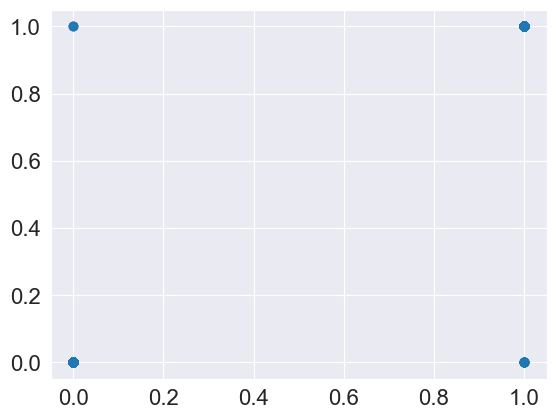

In [167]:
from matplotlib import pyplot as plt
plt.scatter(y_test, ml.predict(X_test), alpha=0.3)

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = ml.predict(X_test)
# The `squared=False` bit tells this function to return the ROOT mean squared error
mse = mean_squared_error(y_test, ml.predict(X_test))
mae = mean_absolute_error(y_test, ml.predict(X_test))
print("Root Mean Square Error:", np.sqrt(mse))
print("Mean Absolute Error:", mae)
print(f'CatBoost MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

Root Mean Square Error: 0.16240338576579322
Mean Absolute Error: 0.026374859708193043
CatBoost MAE score on the X_test is: 0.026374859708193043


In [169]:
#check performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1301
           1       0.98      0.92      0.95       481

    accuracy                           0.97      1782
   macro avg       0.98      0.96      0.97      1782
weighted avg       0.97      0.97      0.97      1782



In [170]:
#make predictions on test set
test['Target'] = ml.predict(test[features])

In [171]:
sub = test[['ID', 'Target']]

In [172]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [173]:
sub.to_csv('Submissions/UHA_23_crypto_CatBoost.csv', index=False)

In [174]:
# ///////////////////////////////////////////////////////////////////////////////////////////////////////

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
cat = CatBoostClassifier()

In [177]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.5, 1, 1.5]
}

In [178]:
# Perform grid search cross-validation
grid_search = GridSearchCV(
    cat,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

In [179]:
grid_search.fit(X_train, y_train)

0:	learn: 0.5619695	total: 14.1ms	remaining: 14.1s
1:	learn: 0.4653783	total: 27.4ms	remaining: 13.7s
2:	learn: 0.4029467	total: 39.2ms	remaining: 13s
3:	learn: 0.3604255	total: 51ms	remaining: 12.7s
4:	learn: 0.3393179	total: 63.1ms	remaining: 12.6s
5:	learn: 0.3164278	total: 74.5ms	remaining: 12.3s
6:	learn: 0.2938581	total: 84.3ms	remaining: 12s
7:	learn: 0.2790576	total: 94.7ms	remaining: 11.7s
8:	learn: 0.2678693	total: 105ms	remaining: 11.5s
9:	learn: 0.2569480	total: 117ms	remaining: 11.6s
10:	learn: 0.2431511	total: 127ms	remaining: 11.4s
11:	learn: 0.2336520	total: 137ms	remaining: 11.3s
12:	learn: 0.2264934	total: 149ms	remaining: 11.3s
13:	learn: 0.2205184	total: 161ms	remaining: 11.4s
14:	learn: 0.2149809	total: 172ms	remaining: 11.3s
15:	learn: 0.2108773	total: 182ms	remaining: 11.2s
16:	learn: 0.2050507	total: 192ms	remaining: 11.1s
17:	learn: 0.1995617	total: 202ms	remaining: 11s
18:	learn: 0.1944215	total: 212ms	remaining: 10.9s
19:	learn: 0.1907543	total: 225ms	remaini

167:	learn: 0.0346063	total: 1.9s	remaining: 9.4s
168:	learn: 0.0342597	total: 1.91s	remaining: 9.4s
169:	learn: 0.0339264	total: 1.92s	remaining: 9.38s
170:	learn: 0.0335969	total: 1.93s	remaining: 9.35s
171:	learn: 0.0334513	total: 1.94s	remaining: 9.34s
172:	learn: 0.0333198	total: 1.95s	remaining: 9.32s
173:	learn: 0.0329701	total: 1.96s	remaining: 9.3s
174:	learn: 0.0327738	total: 1.97s	remaining: 9.29s
175:	learn: 0.0324023	total: 1.98s	remaining: 9.26s
176:	learn: 0.0322045	total: 1.99s	remaining: 9.25s
177:	learn: 0.0320139	total: 2s	remaining: 9.23s
178:	learn: 0.0317815	total: 2.01s	remaining: 9.21s
179:	learn: 0.0315725	total: 2.02s	remaining: 9.2s
180:	learn: 0.0314229	total: 2.03s	remaining: 9.18s
181:	learn: 0.0310977	total: 2.04s	remaining: 9.16s
182:	learn: 0.0308262	total: 2.05s	remaining: 9.14s
183:	learn: 0.0306394	total: 2.06s	remaining: 9.13s
184:	learn: 0.0304475	total: 2.07s	remaining: 9.11s
185:	learn: 0.0302237	total: 2.08s	remaining: 9.09s
186:	learn: 0.029926

332:	learn: 0.0110107	total: 3.58s	remaining: 7.17s
333:	learn: 0.0109942	total: 3.59s	remaining: 7.16s
334:	learn: 0.0109166	total: 3.6s	remaining: 7.15s
335:	learn: 0.0108606	total: 3.61s	remaining: 7.14s
336:	learn: 0.0107654	total: 3.62s	remaining: 7.13s
337:	learn: 0.0107132	total: 3.63s	remaining: 7.11s
338:	learn: 0.0106559	total: 3.64s	remaining: 7.1s
339:	learn: 0.0106083	total: 3.65s	remaining: 7.09s
340:	learn: 0.0105697	total: 3.66s	remaining: 7.07s
341:	learn: 0.0105043	total: 3.67s	remaining: 7.06s
342:	learn: 0.0104335	total: 3.68s	remaining: 7.04s
343:	learn: 0.0103769	total: 3.69s	remaining: 7.03s
344:	learn: 0.0103273	total: 3.7s	remaining: 7.02s
345:	learn: 0.0102895	total: 3.71s	remaining: 7.01s
346:	learn: 0.0102428	total: 3.72s	remaining: 7s
347:	learn: 0.0101791	total: 3.73s	remaining: 6.99s
348:	learn: 0.0100746	total: 3.74s	remaining: 6.98s
349:	learn: 0.0100291	total: 3.75s	remaining: 6.96s
350:	learn: 0.0099569	total: 3.76s	remaining: 6.95s
351:	learn: 0.0099

503:	learn: 0.0047998	total: 5.25s	remaining: 5.16s
504:	learn: 0.0047731	total: 5.26s	remaining: 5.16s
505:	learn: 0.0047551	total: 5.27s	remaining: 5.15s
506:	learn: 0.0047236	total: 5.28s	remaining: 5.13s
507:	learn: 0.0047144	total: 5.29s	remaining: 5.12s
508:	learn: 0.0046835	total: 5.3s	remaining: 5.11s
509:	learn: 0.0046580	total: 5.31s	remaining: 5.1s
510:	learn: 0.0046400	total: 5.32s	remaining: 5.09s
511:	learn: 0.0046133	total: 5.33s	remaining: 5.08s
512:	learn: 0.0045981	total: 5.34s	remaining: 5.07s
513:	learn: 0.0045593	total: 5.35s	remaining: 5.06s
514:	learn: 0.0045505	total: 5.36s	remaining: 5.05s
515:	learn: 0.0045219	total: 5.37s	remaining: 5.04s
516:	learn: 0.0045060	total: 5.38s	remaining: 5.03s
517:	learn: 0.0044917	total: 5.39s	remaining: 5.01s
518:	learn: 0.0044692	total: 5.4s	remaining: 5s
519:	learn: 0.0044603	total: 5.41s	remaining: 4.99s
520:	learn: 0.0044369	total: 5.42s	remaining: 4.98s
521:	learn: 0.0044146	total: 5.42s	remaining: 4.97s
522:	learn: 0.0044

669:	learn: 0.0029965	total: 6.72s	remaining: 3.31s
670:	learn: 0.0029965	total: 6.73s	remaining: 3.3s
671:	learn: 0.0029965	total: 6.74s	remaining: 3.29s
672:	learn: 0.0029965	total: 6.75s	remaining: 3.28s
673:	learn: 0.0029854	total: 6.76s	remaining: 3.27s
674:	learn: 0.0029762	total: 6.76s	remaining: 3.26s
675:	learn: 0.0029599	total: 6.77s	remaining: 3.25s
676:	learn: 0.0029576	total: 6.78s	remaining: 3.24s
677:	learn: 0.0029443	total: 6.79s	remaining: 3.23s
678:	learn: 0.0029334	total: 6.8s	remaining: 3.21s
679:	learn: 0.0029251	total: 6.81s	remaining: 3.2s
680:	learn: 0.0029251	total: 6.82s	remaining: 3.19s
681:	learn: 0.0029251	total: 6.83s	remaining: 3.18s
682:	learn: 0.0029251	total: 6.83s	remaining: 3.17s
683:	learn: 0.0029251	total: 6.84s	remaining: 3.16s
684:	learn: 0.0029235	total: 6.85s	remaining: 3.15s
685:	learn: 0.0029208	total: 6.86s	remaining: 3.14s
686:	learn: 0.0029208	total: 6.87s	remaining: 3.13s
687:	learn: 0.0029117	total: 6.88s	remaining: 3.12s
688:	learn: 0.0

834:	learn: 0.0027140	total: 8.21s	remaining: 1.62s
835:	learn: 0.0027140	total: 8.22s	remaining: 1.61s
836:	learn: 0.0027139	total: 8.23s	remaining: 1.6s
837:	learn: 0.0027139	total: 8.24s	remaining: 1.59s
838:	learn: 0.0027139	total: 8.25s	remaining: 1.58s
839:	learn: 0.0027139	total: 8.26s	remaining: 1.57s
840:	learn: 0.0027139	total: 8.26s	remaining: 1.56s
841:	learn: 0.0027139	total: 8.27s	remaining: 1.55s
842:	learn: 0.0027139	total: 8.29s	remaining: 1.54s
843:	learn: 0.0027139	total: 8.29s	remaining: 1.53s
844:	learn: 0.0027139	total: 8.3s	remaining: 1.52s
845:	learn: 0.0027139	total: 8.31s	remaining: 1.51s
846:	learn: 0.0027139	total: 8.32s	remaining: 1.5s
847:	learn: 0.0027139	total: 8.33s	remaining: 1.49s
848:	learn: 0.0027139	total: 8.34s	remaining: 1.48s
849:	learn: 0.0027139	total: 8.35s	remaining: 1.47s
850:	learn: 0.0027139	total: 8.36s	remaining: 1.46s
851:	learn: 0.0027138	total: 8.37s	remaining: 1.45s
852:	learn: 0.0027138	total: 8.38s	remaining: 1.44s
853:	learn: 0.0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000205D28941F0>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.5, 1, 1.5],
                         'depth': [3, 5, 7], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1]})

In [180]:

# Print the best hyperparameters and mean accuracy
print('Best hyperparameters: ', grid_search.best_params_)
print('Mean accuracy: {:.2f}'.format(grid_search.best_score_))

Best hyperparameters:  {'bagging_temperature': 0.5, 'depth': 7, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Mean accuracy: 0.97


In [181]:
# Define the CatBoost classifier
cat = CatBoostClassifier(
    bagging_temperature=0.5, 
    depth=5, 
    l2_leaf_reg=3, 
    learning_rate=0.1
)

In [182]:
 cat.fit(X_train, y_train)

0:	learn: 0.5712124	total: 8.21ms	remaining: 8.21s
1:	learn: 0.5066460	total: 16.2ms	remaining: 8.07s
2:	learn: 0.4440061	total: 24ms	remaining: 7.99s
3:	learn: 0.4147309	total: 30.9ms	remaining: 7.69s
4:	learn: 0.3876928	total: 38.3ms	remaining: 7.62s
5:	learn: 0.3550531	total: 47.1ms	remaining: 7.81s
6:	learn: 0.3390294	total: 56.3ms	remaining: 7.99s
7:	learn: 0.3220011	total: 63.9ms	remaining: 7.92s
8:	learn: 0.3112687	total: 70.4ms	remaining: 7.75s
9:	learn: 0.3023411	total: 76.9ms	remaining: 7.62s
10:	learn: 0.2886481	total: 84.2ms	remaining: 7.57s
11:	learn: 0.2790863	total: 91.4ms	remaining: 7.52s
12:	learn: 0.2715247	total: 98.4ms	remaining: 7.47s
13:	learn: 0.2664396	total: 105ms	remaining: 7.38s
14:	learn: 0.2584676	total: 112ms	remaining: 7.37s
15:	learn: 0.2521689	total: 119ms	remaining: 7.32s
16:	learn: 0.2448386	total: 126ms	remaining: 7.26s
17:	learn: 0.2389055	total: 132ms	remaining: 7.21s
18:	learn: 0.2332355	total: 142ms	remaining: 7.33s
19:	learn: 0.2302624	total: 15

162:	learn: 0.0745434	total: 1.06s	remaining: 5.44s
163:	learn: 0.0742973	total: 1.06s	remaining: 5.43s
164:	learn: 0.0741516	total: 1.07s	remaining: 5.43s
165:	learn: 0.0739550	total: 1.08s	remaining: 5.43s
166:	learn: 0.0735026	total: 1.09s	remaining: 5.42s
167:	learn: 0.0732354	total: 1.09s	remaining: 5.41s
168:	learn: 0.0729850	total: 1.1s	remaining: 5.39s
169:	learn: 0.0727885	total: 1.1s	remaining: 5.39s
170:	learn: 0.0722665	total: 1.11s	remaining: 5.38s
171:	learn: 0.0721872	total: 1.11s	remaining: 5.36s
172:	learn: 0.0717103	total: 1.12s	remaining: 5.37s
173:	learn: 0.0715640	total: 1.13s	remaining: 5.35s
174:	learn: 0.0710979	total: 1.14s	remaining: 5.35s
175:	learn: 0.0708257	total: 1.14s	remaining: 5.34s
176:	learn: 0.0702529	total: 1.15s	remaining: 5.32s
177:	learn: 0.0700890	total: 1.15s	remaining: 5.32s
178:	learn: 0.0696665	total: 1.16s	remaining: 5.31s
179:	learn: 0.0693021	total: 1.16s	remaining: 5.29s
180:	learn: 0.0687526	total: 1.17s	remaining: 5.31s
181:	learn: 0.

327:	learn: 0.0378004	total: 2.02s	remaining: 4.14s
328:	learn: 0.0376335	total: 2.03s	remaining: 4.13s
329:	learn: 0.0375686	total: 2.03s	remaining: 4.13s
330:	learn: 0.0375220	total: 2.04s	remaining: 4.12s
331:	learn: 0.0374182	total: 2.05s	remaining: 4.12s
332:	learn: 0.0374010	total: 2.05s	remaining: 4.11s
333:	learn: 0.0373125	total: 2.06s	remaining: 4.1s
334:	learn: 0.0371584	total: 2.06s	remaining: 4.09s
335:	learn: 0.0368755	total: 2.07s	remaining: 4.08s
336:	learn: 0.0367698	total: 2.07s	remaining: 4.07s
337:	learn: 0.0366698	total: 2.08s	remaining: 4.07s
338:	learn: 0.0365162	total: 2.08s	remaining: 4.06s
339:	learn: 0.0364331	total: 2.09s	remaining: 4.05s
340:	learn: 0.0362211	total: 2.09s	remaining: 4.04s
341:	learn: 0.0361666	total: 2.1s	remaining: 4.04s
342:	learn: 0.0359733	total: 2.1s	remaining: 4.03s
343:	learn: 0.0359199	total: 2.11s	remaining: 4.03s
344:	learn: 0.0358621	total: 2.11s	remaining: 4.01s
345:	learn: 0.0357641	total: 2.12s	remaining: 4s
346:	learn: 0.0356

504:	learn: 0.0207663	total: 3.04s	remaining: 2.98s
505:	learn: 0.0206808	total: 3.05s	remaining: 2.97s
506:	learn: 0.0205586	total: 3.05s	remaining: 2.97s
507:	learn: 0.0204944	total: 3.06s	remaining: 2.97s
508:	learn: 0.0204456	total: 3.07s	remaining: 2.96s
509:	learn: 0.0203932	total: 3.07s	remaining: 2.95s
510:	learn: 0.0203356	total: 3.08s	remaining: 2.94s
511:	learn: 0.0202698	total: 3.09s	remaining: 2.94s
512:	learn: 0.0202364	total: 3.09s	remaining: 2.94s
513:	learn: 0.0201725	total: 3.1s	remaining: 2.93s
514:	learn: 0.0200522	total: 3.11s	remaining: 2.93s
515:	learn: 0.0200055	total: 3.12s	remaining: 2.92s
516:	learn: 0.0198978	total: 3.12s	remaining: 2.92s
517:	learn: 0.0197610	total: 3.13s	remaining: 2.91s
518:	learn: 0.0196983	total: 3.13s	remaining: 2.9s
519:	learn: 0.0196235	total: 3.14s	remaining: 2.9s
520:	learn: 0.0195166	total: 3.15s	remaining: 2.9s
521:	learn: 0.0195079	total: 3.15s	remaining: 2.89s
522:	learn: 0.0194459	total: 3.16s	remaining: 2.88s
523:	learn: 0.01

677:	learn: 0.0131360	total: 4.06s	remaining: 1.93s
678:	learn: 0.0130723	total: 4.07s	remaining: 1.93s
679:	learn: 0.0130525	total: 4.08s	remaining: 1.92s
680:	learn: 0.0130361	total: 4.08s	remaining: 1.91s
681:	learn: 0.0129889	total: 4.09s	remaining: 1.91s
682:	learn: 0.0129567	total: 4.1s	remaining: 1.9s
683:	learn: 0.0129031	total: 4.1s	remaining: 1.9s
684:	learn: 0.0128957	total: 4.11s	remaining: 1.89s
685:	learn: 0.0128833	total: 4.11s	remaining: 1.88s
686:	learn: 0.0128503	total: 4.12s	remaining: 1.88s
687:	learn: 0.0128126	total: 4.12s	remaining: 1.87s
688:	learn: 0.0127690	total: 4.13s	remaining: 1.86s
689:	learn: 0.0127609	total: 4.13s	remaining: 1.86s
690:	learn: 0.0127472	total: 4.14s	remaining: 1.85s
691:	learn: 0.0127255	total: 4.14s	remaining: 1.84s
692:	learn: 0.0126925	total: 4.15s	remaining: 1.84s
693:	learn: 0.0126831	total: 4.16s	remaining: 1.83s
694:	learn: 0.0126758	total: 4.16s	remaining: 1.82s
695:	learn: 0.0126238	total: 4.16s	remaining: 1.82s
696:	learn: 0.01

854:	learn: 0.0090763	total: 5.07s	remaining: 861ms
855:	learn: 0.0090477	total: 5.08s	remaining: 855ms
856:	learn: 0.0090410	total: 5.09s	remaining: 849ms
857:	learn: 0.0090257	total: 5.09s	remaining: 843ms
858:	learn: 0.0090205	total: 5.1s	remaining: 837ms
859:	learn: 0.0090060	total: 5.11s	remaining: 831ms
860:	learn: 0.0089872	total: 5.11s	remaining: 826ms
861:	learn: 0.0089727	total: 5.12s	remaining: 820ms
862:	learn: 0.0089580	total: 5.13s	remaining: 814ms
863:	learn: 0.0089580	total: 5.13s	remaining: 808ms
864:	learn: 0.0089580	total: 5.13s	remaining: 801ms
865:	learn: 0.0089580	total: 5.14s	remaining: 795ms
866:	learn: 0.0089413	total: 5.14s	remaining: 789ms
867:	learn: 0.0089333	total: 5.15s	remaining: 783ms
868:	learn: 0.0089292	total: 5.16s	remaining: 777ms
869:	learn: 0.0089259	total: 5.16s	remaining: 771ms
870:	learn: 0.0089112	total: 5.17s	remaining: 765ms
871:	learn: 0.0089033	total: 5.17s	remaining: 759ms
872:	learn: 0.0088891	total: 5.18s	remaining: 754ms
873:	learn: 0

In [183]:
# Make predictions on the testing data
ypred = cat.predict(X_test)

In [184]:
#check performance of the model
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1301
           1       0.98      0.93      0.96       481

    accuracy                           0.98      1782
   macro avg       0.98      0.96      0.97      1782
weighted avg       0.98      0.98      0.98      1782



In [185]:
cat.score(X_test, y_test) # Show a score

0.9775533108866442

In [186]:
#make predictions on test set
test['Target'] = cat.predict(test[features])

In [187]:
subb = test[['ID', 'Target']]

In [188]:
subb.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [189]:
sub.to_csv('Submissions/UHA_23_crypto_CatBoost_4TH.csv', index=False)

In [190]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////

In [191]:
# IMPLEMENTING KFOLD

In [192]:
# !pip install torch

In [193]:
from dataclasses import dataclass
import catboost
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, KFold
from catboost import CatBoostClassifier
from sklearn.metrics import (
    confusion_matrix, 
    roc_curve, 
    plot_roc_curve
)
import json
import random
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 16})

In [194]:
# !pip install dataclasses
# !python --version

In [195]:
class GeneralModel:
    def __init__(self, submodels):
        self.submodels = submodels
    
    def predict_proba(self, x):
        preds = [submodel.predict_proba(x) for submodel in self.submodels]
        return sum(preds) / len(preds)
    
    def predict(self, x, threshold=0.7):
        return [int(x[-1] > threshold) for x in self.predict_proba(x)]

In [196]:
@dataclass
class config:
    test_path = 'Test.csv';
    train_path = 'Train.csv.csv'
#     submission_path = 'Submissions/UHA_23_crypto_CatBoost_Final.csv'
    random_seed = 43
    validation_size = 0.1
    train_iterations = 1000
    eval_metric = 'AUC'
    learning_rate=0.5
    loss_function='CrossEntropy'
    nsplits = 5

In [197]:
kf = KFold(n_splits=config.nsplits)
general_model = GeneralModel([
    CatBoostClassifier(
        iterations=random.choice([1000, 2000, 3000, 5000, 7000]),
        random_seed=config.random_seed,
        learning_rate = 0.1**random.randint(1, 3),
        loss_function=random.choice(['Logloss', 'CrossEntropy']),
        custom_loss=random.choice(['Accuracy', 'AUC']),
        bagging_temperature=0.5, 
        depth=5, 
        l2_leaf_reg=3, 
#         learning_rate=0.1
    )
for _ in range(config.nsplits)])

current_model = 0
for train_index, test_index in kf.split(X_train):

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    general_model.submodels[current_model] = general_model.submodels[current_model].fit(
        X_train_fold, y_train_fold,
        eval_set=(X_test_fold, y_test_fold),
        verbose=False
    )
    current_model += 1

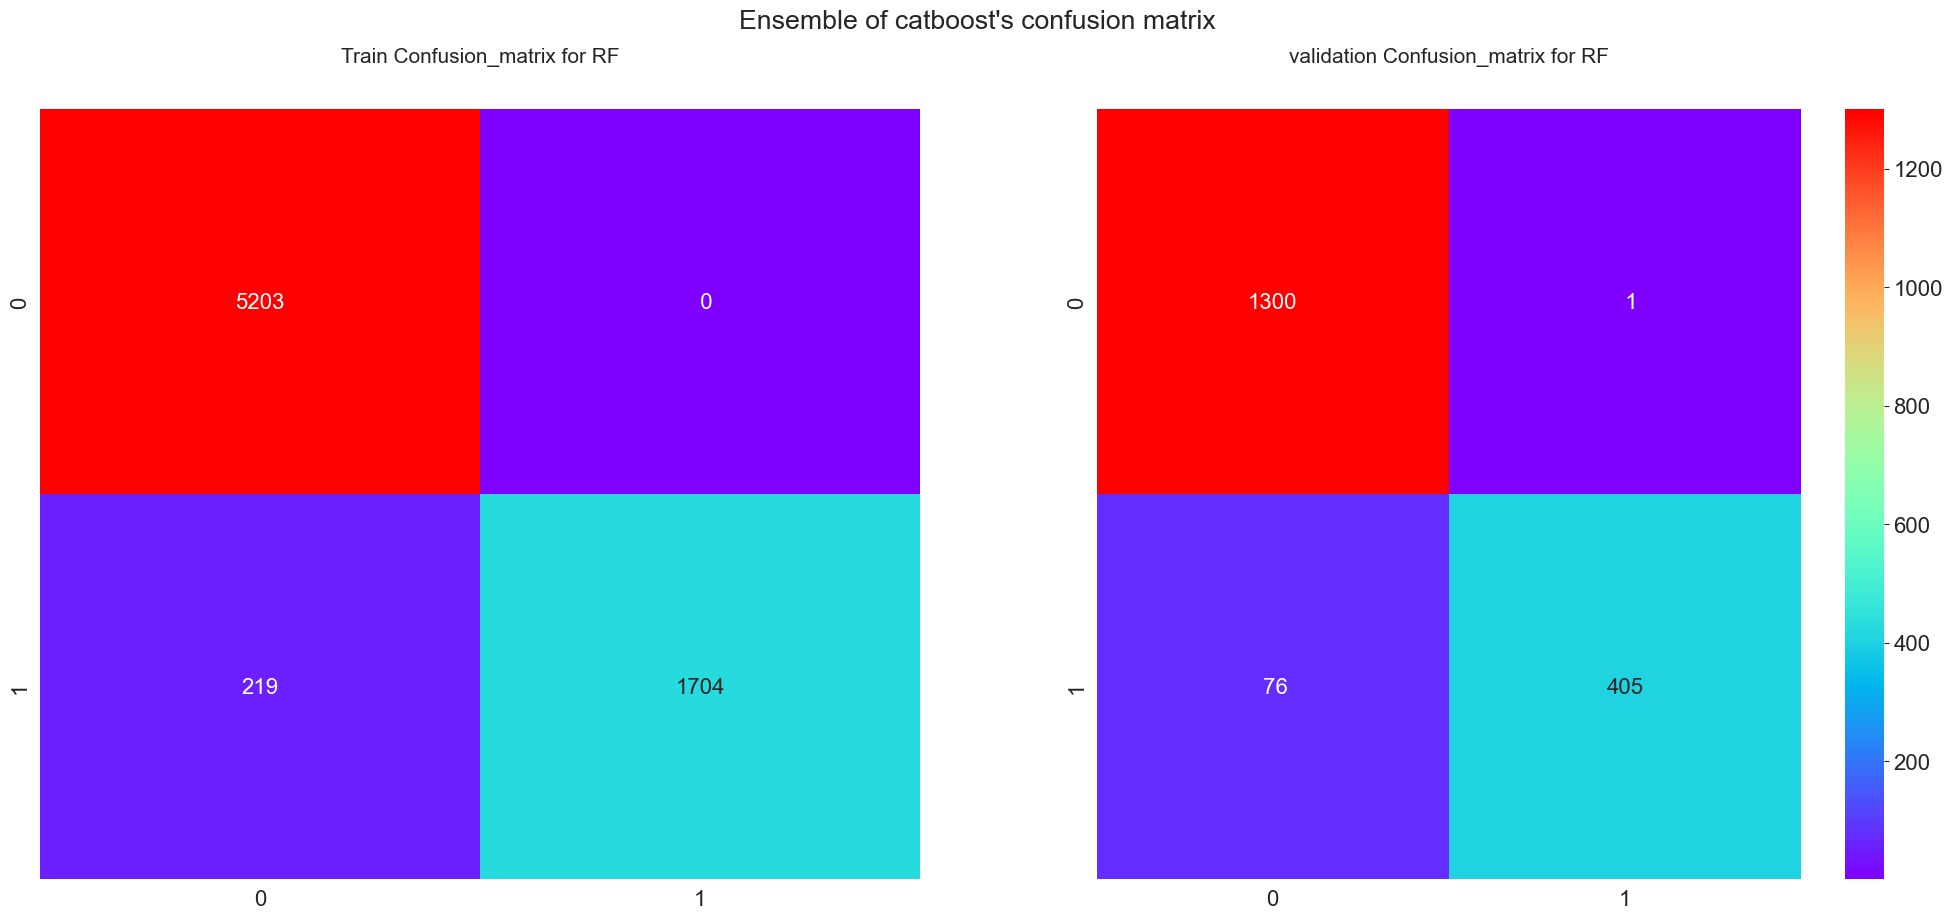

In [198]:
plt.figure(figsize = (25, 10))
plt.suptitle("Ensemble of catboost's confusion matrix\n")
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_train,general_model.predict(X_train)),annot=True,fmt='3.0f', cbar = False, cmap = 'rainbow')
plt.title('Train Confusion_matrix for RF', y=1.05, size=15)

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test,general_model.predict(X_test)),annot=True,fmt='3.0f', cmap = 'rainbow')
plt.title('validation Confusion_matrix for RF', y=1.05, size=15)
plt.show()

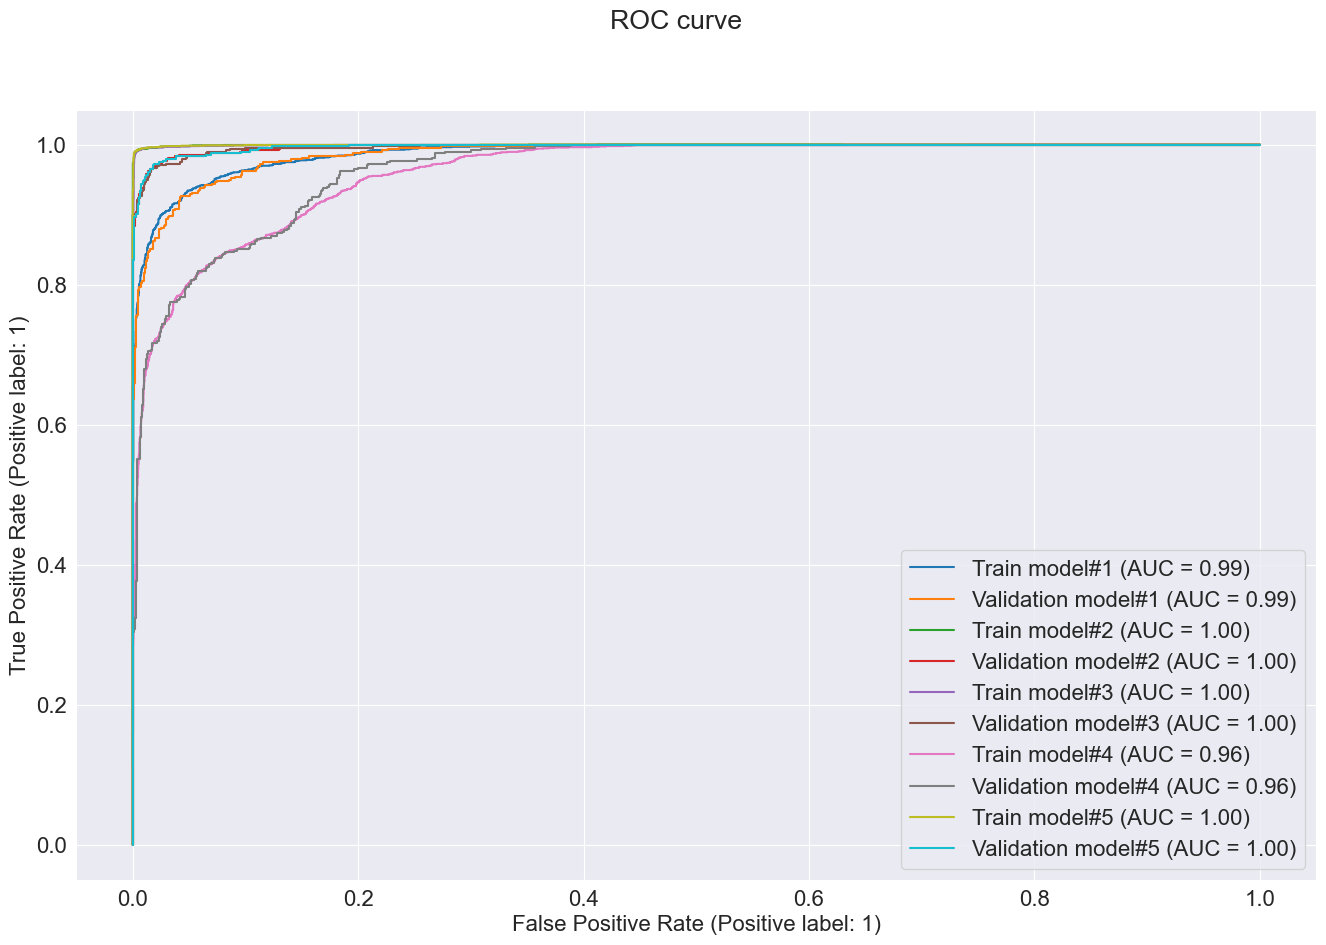

In [199]:
plt.figure(figsize = (16, 10))
for m_index in range(config.nsplits):
    train = plot_roc_curve(general_model.submodels[m_index], X_train, y_train, name = f'Train model#{m_index+1}', ax = plt.gca())
    test = plot_roc_curve(general_model.submodels[m_index], X_test, y_test, name = f'Validation model#{m_index+1}', ax=train.ax_)
    test.figure_.suptitle(f"ROC curve")
plt.show()

In [212]:
test_data = test[features]

In [213]:
test['Target'] = general_model.predict(test_data, threshold = 0.5)

In [214]:
subb1 = test[['ID', 'Target']]

In [215]:
subb1.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,1
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [216]:
subb1.to_csv('Submissions/UHA_23_crypto_CatBoost_5TH.csv', index=False)

In [ ]:
# //////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
# Trying SVM Classifier

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [218]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [219]:
# Initialize an SVM classifier
svm = SVC()

In [ ]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Train the classifier on the training set using the best hyperparameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

In [ ]:
# Use the trained classifier to predict labels for the test set
y_pred_svm = best_svm.predict(X_test)

In [ ]:
# Compute the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

In [ ]:
# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

In [ ]:
#check performance of the model
print(classification_report(y_test, y_pred_svm))

In [ ]:
#make predictions on test set
test['Target'] = best_svm.predict(test[features])

In [ ]:
sub_svm = test[['ID', 'Target']]

In [ ]:
sub_svm.head()

In [ ]:
sub_svm.to_csv('Submissions/UHA_23_crypto_SVM.csv', index=False)